<a href="https://colab.research.google.com/github/manikur/Python-Programming/blob/main/Financial_Time_Series_Financial_and_Related_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PythonTsa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 6.7 MB/s eta 0:00:00


# (Monthly Returns of Procter and Gamble Stock from 1961 to 2016

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PythonTsa.plot_acf_pacf import acf_pacf_fig
import statsmodels.api as sm
from PythonTsa.LjungBoxtest import plot_LB_pvalue
from scipy.stats import norm
from PythonTsa.datadir import getdtapath
dtapath=getdtapath()
pgret=pd.read_csv(dtapath +'monthly returns of Procter n Gamble stock n 3 market indexes 1961 to 2016.csv',header=0)
pgret=pgret['RET']
dates=pd.date_range('1961-01', periods= len(pgret),freq='M')
pgret.index=dates
pgret=100*pgret
# many pgret values are too small, which may affect convergence
# of the optimizer when estimating the parameters, so rescale it.
sm.tsa.kpss(pgret, regression='c', nlags='auto')




<ipython-input-8-a05290367852>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates=pd.date_range('1961-01', periods= len(pgret),freq='M')
<ipython-input-8-a05290367852>:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  sm.tsa.kpss(pgret, regression='c', nlags='auto')


(0.11109642750067265,
 0.1,
 4,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

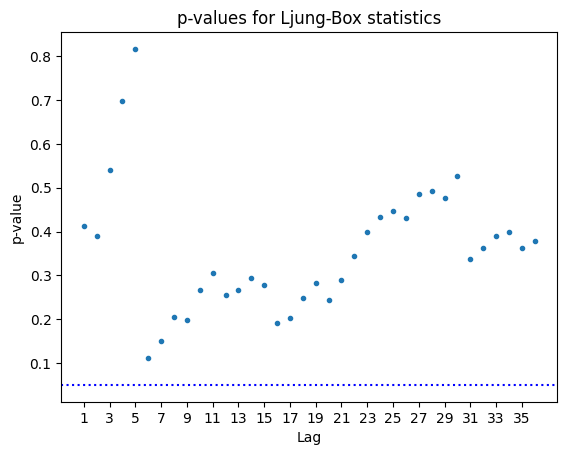

In [ ]:
plot_LB_pvalue(pgret, noestimatedcoef=0, nolags=36)
plt.show()

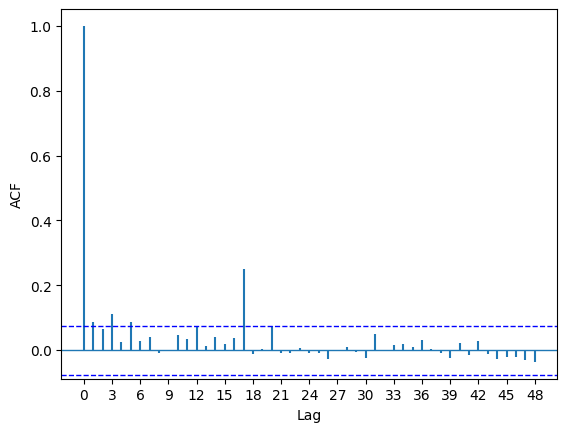

In [ ]:
acf_pacf_fig(pgret**2, lag=48)
plt.show()

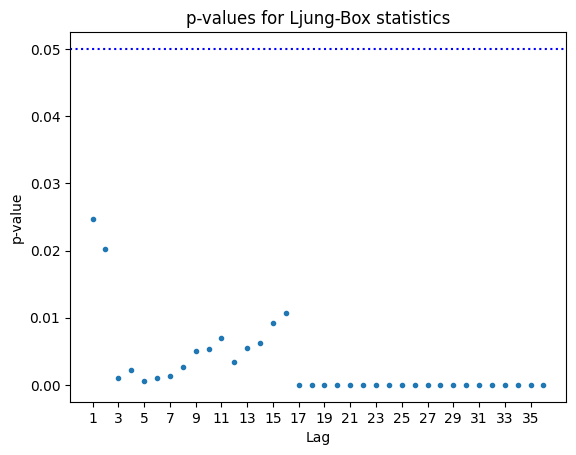

In [ ]:
plot_LB_pvalue(pgret**2, noestimatedcoef=0, nolags=36)
plt.show()

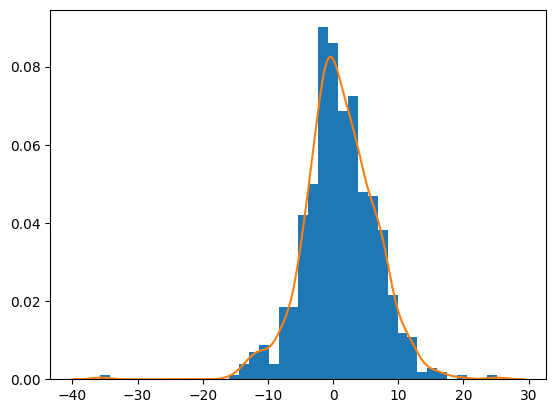

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
hfig=ax.hist(pgret, bins=40, density=True, label='Histogram')
kde = sm.nonparametric.KDEUnivariate(pgret)
kde.fit()
ax.plot(kde.support, kde.density, label='KDE')

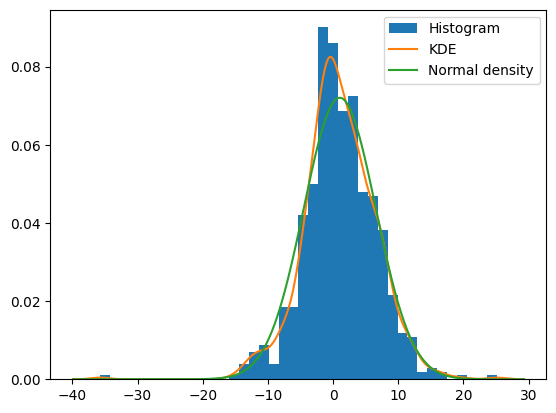

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
hfig=ax.hist(pgret, bins=40, density=True, label='Histogram')
kde = sm.nonparametric.KDEUnivariate(pgret)
kde.fit()
ax.plot(kde.support, kde.density, label='KDE')
smean=np.mean(pgret)
scal=np.std(pgret, ddof=1)
normden=norm.pdf(kde.support, loc=smean, scale=scal)
ax.plot(kde.support, normden, label='Normal density')
ax.legend(loc='best')
plt.show()


# Germany DAX Daily Index from Oct 23, 2014 to July 7, 2019

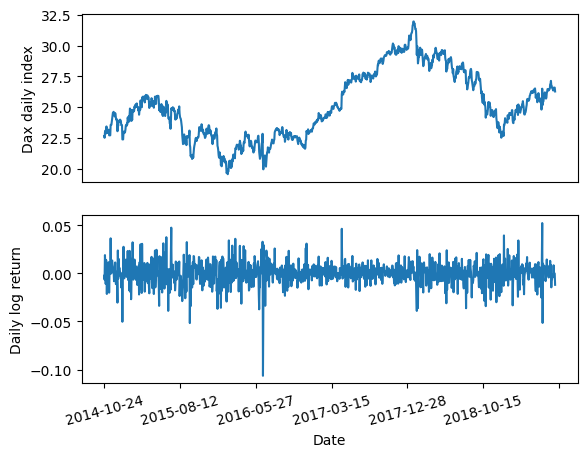

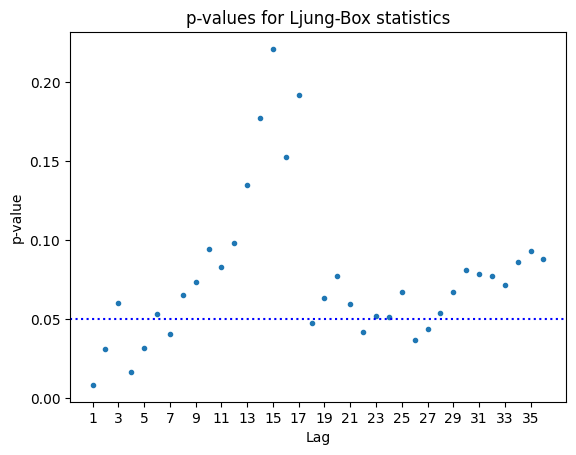

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PythonTsa.LjungBoxtest import plot_LB_pvalue
from PythonTsa.datadir import getdtapath
dtapath=getdtapath()
dax=pd.read_csv(dtapath + 'DAX.csv', header=0)
dax.rename(columns={'Adj Close' : 'index'}, inplace=True)
dax['logreturns']=np.log(dax['index']/dax['index'].shift(1))
dax = dax.dropna()
logret = dax['logreturns']
logret.index = dax['Date']
fig = plt.figure()
dax['index'].plot(ax= fig.add_subplot(211))
plt.ylabel('Dax daily index')
plt.xticks([])
logret.plot(ax= fig.add_subplot(212))
plt.ylabel('Daily log return')
plt.xticks(rotation=15)
plt.show()
plot_LB_pvalue(logret, noestimatedcoef=0, nolags=36)
plt.show()


In [ ]:
logret

,logreturns
Date,
2014-10-24,-0.002379
2014-10-27,-0.006452
2014-10-28,0.019075
2014-10-29,0.006253
2014-10-30,-0.010968
...,...
2019-07-15,0.008504
2019-07-16,0.000489
2019-07-17,0.000000


In [ ]:
logret.index

Index(['2014-10-24', '2014-10-27', '2014-10-28', '2014-10-29', '2014-10-30',
       '2014-10-31', '2014-11-03', '2014-11-04', '2014-11-05', '2014-11-06',
       ...
       '2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12',
       '2019-07-15', '2019-07-16', '2019-07-17', '2019-07-18', '2019-07-19'],
      dtype='object', name='Date', length=1191)

#Stylized Facts of Financial Time Series

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.9/982.9 kB 15.5 MB/s eta 0:00:00


In [ ]:
from arch import arch_model

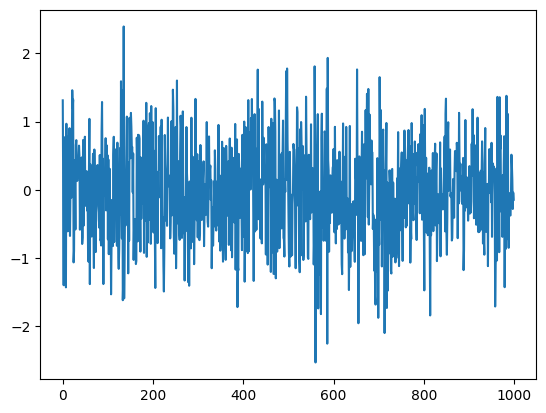

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from arch.univariate import arch_model
sim_mod = arch_model(None, p=1, q=1)
params=[0, 0.1, 0.2, 0.6]
# in general, params=[r, omega, alpha, beta]
sim_data = sim_mod.simulate(params, nobs=1000)
simdata=sim_data['data']
simdata.plot(); plt.show()

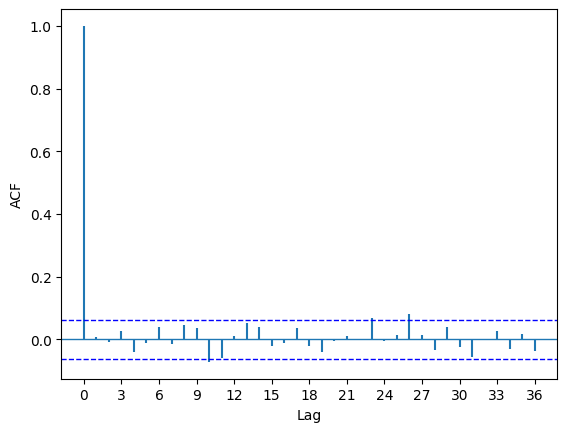

In [ ]:
from PythonTsa.plot_acf_pacf import acf_pacf_fig
acf_pacf_fig(simdata, both=False, lag=36)
plt.show()

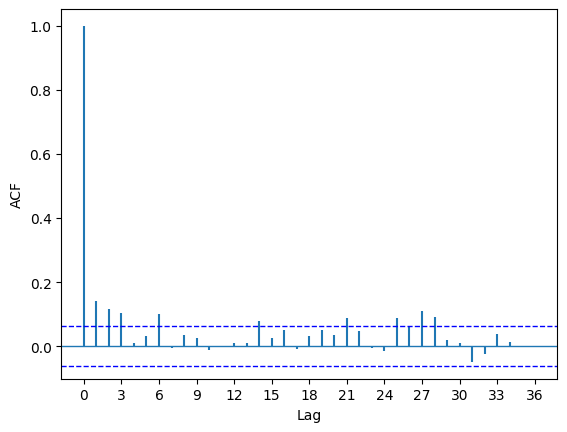

In [ ]:
acf_pacf_fig(simdata**2, both=False, lag=36)
plt.show()

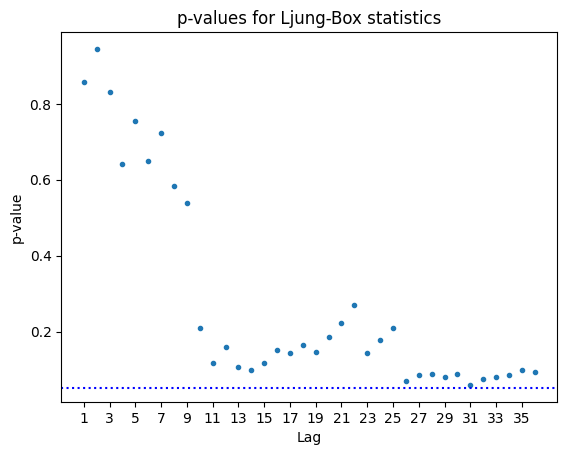

In [ ]:
from PythonTsa.LjungBoxtest import plot_LB_pvalue
plot_LB_pvalue(simdata, noestimatedcoef=0, nolags=36)
plt.show()

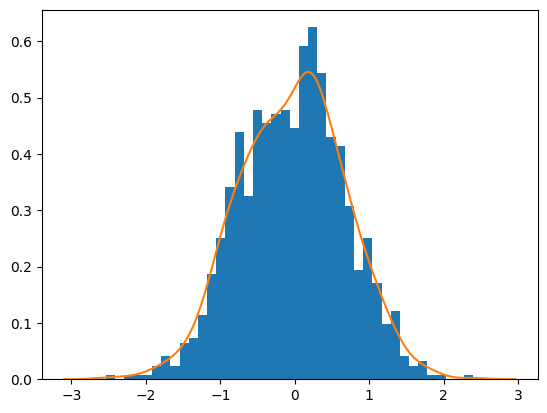

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
hfig=ax.hist(simdata, bins=40, density=True, label='Histogram')
kde = sm.nonparametric.KDEUnivariate(simdata)
kde.fit()
ax.plot(kde.support, kde.density, label='KDE')

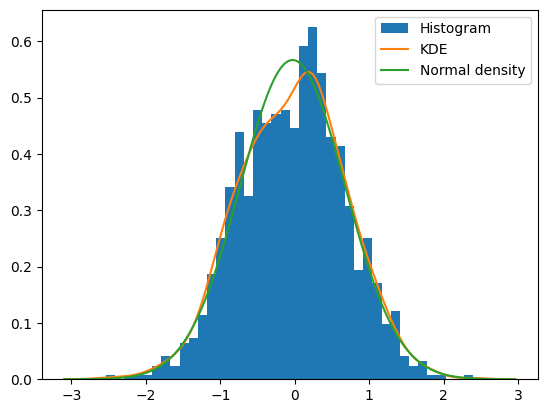

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
hfig=ax.hist(simdata, bins=40, density=True, label='Histogram')
kde = sm.nonparametric.KDEUnivariate(simdata)
kde.fit()
ax.plot(kde.support, kde.density, label='KDE')
smean=np.mean(simdata)
scal=np.std(simdata, ddof=1)
from scipy.stats import norm
normden=norm.pdf(kde.support, loc=smean, scale=scal)
ax.plot(kde.support, normden, label='Normal density')
ax.legend(loc='best'); plt.show()

# Estimation and Testing

In [ ]:
from arch import arch_model
archmod = arch_model(pgret).fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2739.382947188128
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2114.7081527736664
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2345.427788756573
Iteration:      4,   Func. Count:     28,   Neg. LLF: 2078.9687534584496
Iteration:      5,   Func. Count:     33,   Neg. LLF: 2078.967841623913
Iteration:      6,   Func. Count:     38,   Neg. LLF: 2078.967838978205
Iteration:      7,   Func. Count:     42,   Neg. LLF: 2078.9678389782484
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2078.967838978205
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7


In [ ]:
print(archmod.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    RET   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2078.97
Distribution:                  Normal   AIC:                           4165.94
Method:            Maximum Likelihood   BIC:                           4183.98
                                        No. Observations:                  672
Date:                Fri, Oct 11 2024   Df Residuals:                      671
Time:                        07:57:18   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.0918      0.209      5.225  1.746e-07 [  0.682,  1.50

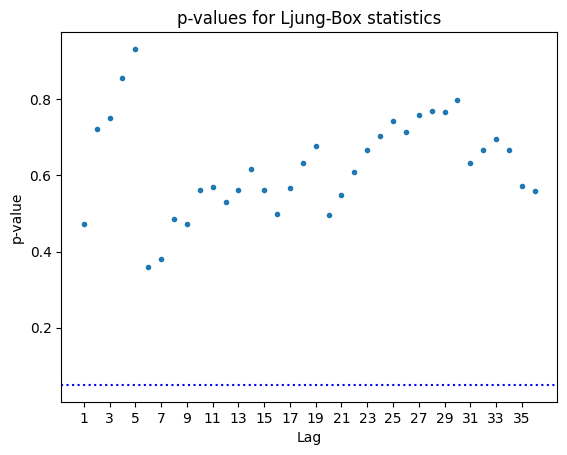

In [ ]:
archresid = archmod.std_resid
plot_LB_pvalue(archresid, noestimatedcoef=0, nolags=36)
plt.show()

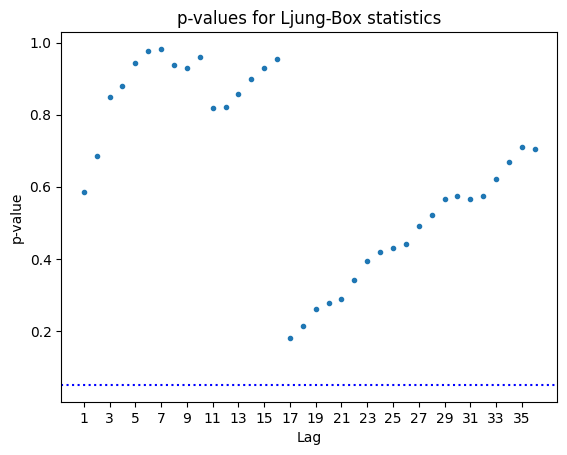

In [ ]:
plot_LB_pvalue(archresid**2, noestimatedcoef=0, nolags=36)
plt.show()

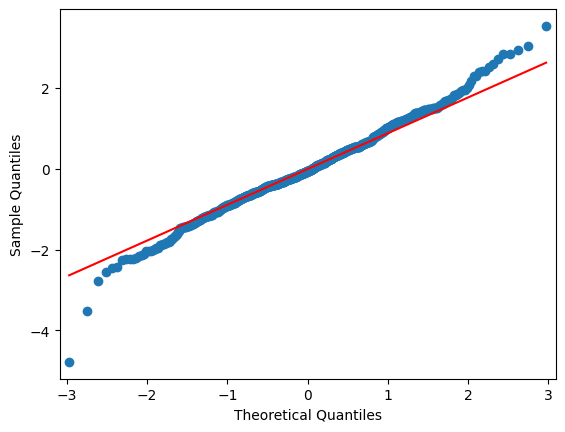

In [ ]:
from statsmodels.graphics.api import qqplot
qqplot(archresid, line='q', fit=True)
plt.show()

In [ ]:
garchT = arch_model(pgret, p=1, q=1, dist='StudentsT')
res = garchT.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3121.5783259543086
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2091.0823011762477
Iteration:      3,   Func. Count:     24,   Neg. LLF: 2168.142925570685
Iteration:      4,   Func. Count:     33,   Neg. LLF: 2072.21023019554
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2072.2034430722
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2072.2017351365184
Iteration:      7,   Func. Count:     51,   Neg. LLF: 2072.197119663295
Iteration:      8,   Func. Count:     57,   Neg. LLF: 2072.1968434439295
Iteration:      9,   Func. Count:     63,   Neg. LLF: 2072.196841697125
Iteration:     10,   Func. Count:     68,   Neg. LLF: 2072.196841697124
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2072.196841697125
            Iterations: 10
            Function evaluations: 68
            Gradient evaluations: 10


In [ ]:
print(res.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                          RET   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2072.20
Distribution:      Standardized Student's t   AIC:                           4154.39
Method:                  Maximum Likelihood   BIC:                           4176.94
                                              No. Observations:                  672
Date:                      Fri, Oct 11 2024   Df Residuals:                      671
Time:                              07:57:54   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1

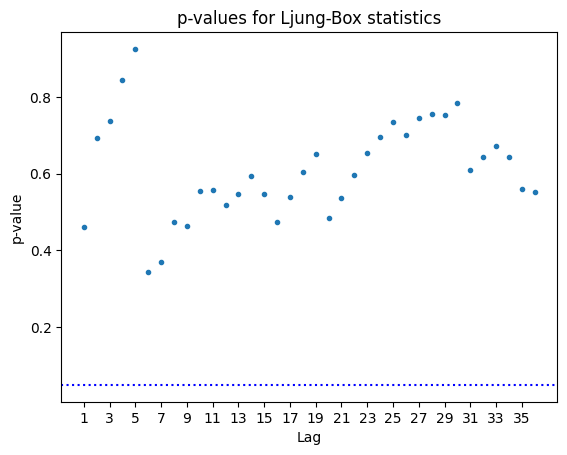

In [ ]:
# nu denotes degree of freedom for the T distribution
archresidT = res.std_resid
plot_LB_pvalue(archresidT, noestimatedcoef=0, nolags=36)
plt.show()

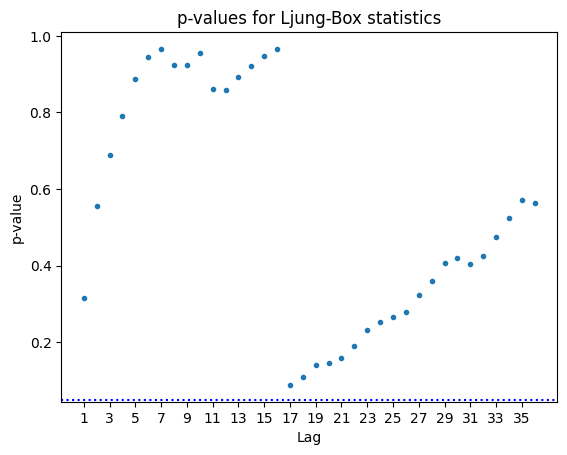

In [ ]:
plot_LB_pvalue(archresidT**2, noestimatedcoef=0, nolags=36)
plt.show()

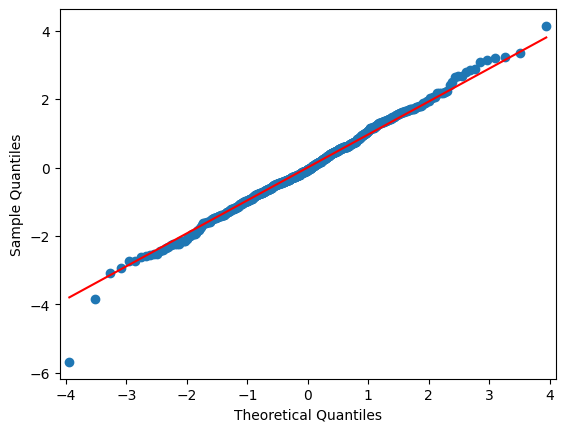

In [ ]:
from scipy import stats
qqplot(archresidT, stats.t, distargs=(9.62,),line='q',fit=True)
# arguments "stats.t" and "distargs" means T distribution and its
# degree of freedom.
plt.show()

# Standard & Poor’s 500 Index Daily Returns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from PythonTsa.plot_acf_pacf import acf_pacf_fig
from PythonTsa.LjungBoxtest import plot_LB_pvalue
from PythonTsa.datadir import getdtapath
dtapath=getdtapath()
ret=pd.read_csv(dtapath + 'SP500dailyreturns.csv',
header=None)



In [ ]:
ret

,0
0,1.358200
1,2.214041
2,-0.205133
3,0.422136
4,-0.879151
...,...
5025,-2.711225
5026,4.959374
5027,0.856268
5028,-0.124158


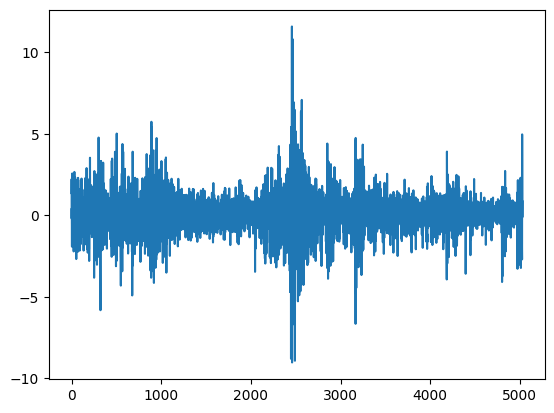

In [ ]:
ret.columns=['returns']
ret=pd.Series(ret['returns'])
ret.plot(); plt.show()

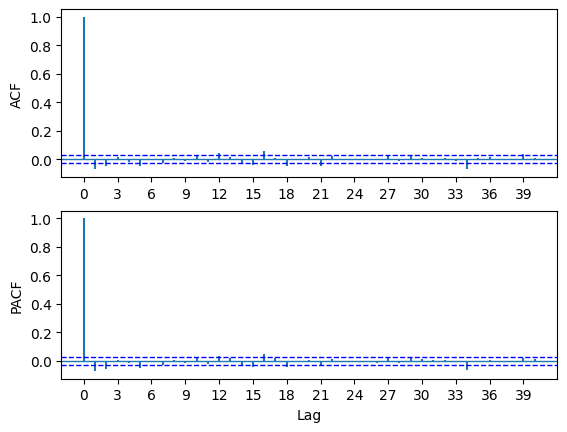

In [ ]:
acf_pacf_fig(ret, both=True, lag=40)
plt.show()

In [ ]:
sm.tsa.kpss(ret, regression='c', nlags='auto')

<ipython-input-32-fac07631fd62>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  sm.tsa.kpss(ret, regression='c', nlags='auto')


(0.1501534339907281,
 0.1,
 22,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

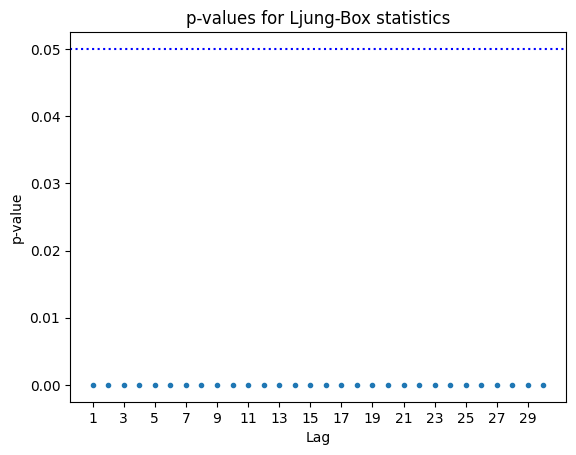

In [ ]:
plot_LB_pvalue(ret, noestimatedcoef=0, nolags=30)
plt.show()

In [ ]:
arma152=sm.tsa.SARIMAX(ret, order=(15,0,2), trend='c').fit(disp=False)
print(arma152.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5030
Model:              SARIMAX(15, 0, 2)   Log Likelihood               -8009.710
Date:                Fri, 11 Oct 2024   AIC                          16057.420
Time:                        08:01:01   BIC                          16181.360
Sample:                             0   HQIC                         16100.846
                               - 5030                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0575      0.041      1.414      0.157      -0.022       0.137
ar.L1         -0.5845      0.061     -9.594      0.000      -0.704      -0.465
ar.L2         -0.7568      0.059    -12.890      0.0

In [ ]:
arma122=sm.tsa.SARIMAX(ret,
order=([1,1,1,1,1,1,1,0,1,0,1,1,1,0,1],0,2), trend='n').fit(disp=False)
print(arma122.summary())

                                                  SARIMAX Results                                                  
Dep. Variable:                                                     returns   No. Observations:                 5030
Model:             SARIMAX([1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15], 0, 2)   Log Likelihood               -8011.944
Date:                                                     Fri, 11 Oct 2024   AIC                          16053.888
Time:                                                             08:02:23   BIC                          16151.736
Sample:                                                                  0   HQIC                         16088.172
                                                                    - 5030                                         
Covariance Type:                                                       opg                                         
                 coef    std err          z      P>|z|      [0.025      

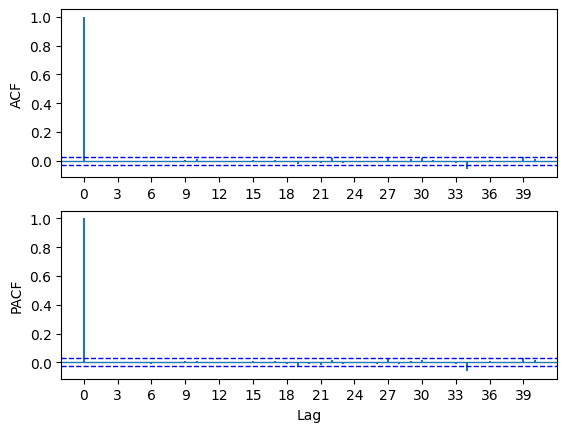

In [ ]:
xresid = arma122.resid
acf_pacf_fig(xresid, both=True, lag=40)
plt.show()

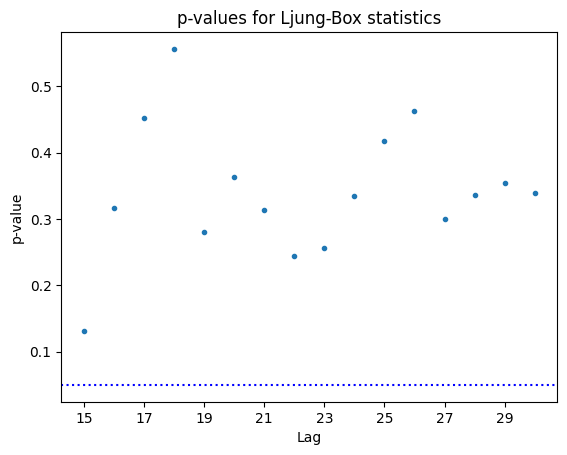

In [ ]:
plot_LB_pvalue(xresid, noestimatedcoef=14, nolags=30)
plt.show()

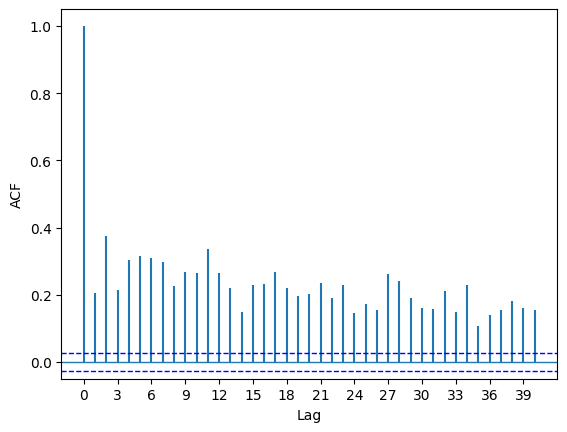

In [ ]:
acf_pacf_fig(xresid**2, lag=40)
plt.show()

In [ ]:
from arch import arch_model
garch = arch_model(xresid, p=2, q=2, mean='Zero')
garchmod = garch.fit(disp='off')
print(garchmod.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6941.21
Distribution:                  Normal   AIC:                           13892.4
Method:            Maximum Likelihood   BIC:                           13925.0
                                        No. Observations:                 5030
Date:                Fri, Oct 11 2024   Df Residuals:                     5030
Time:                        08:03:09   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0301  8.450e-03      3.558  3.738e-04 [1.

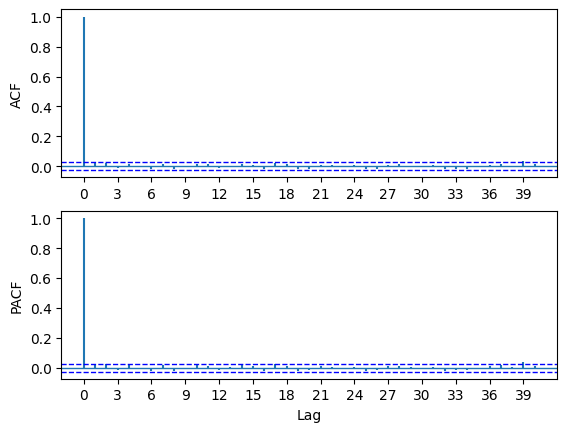

In [ ]:
garchresid = garchmod.std_resid
acf_pacf_fig(garchresid, both=True, lag=40)
plt.show()

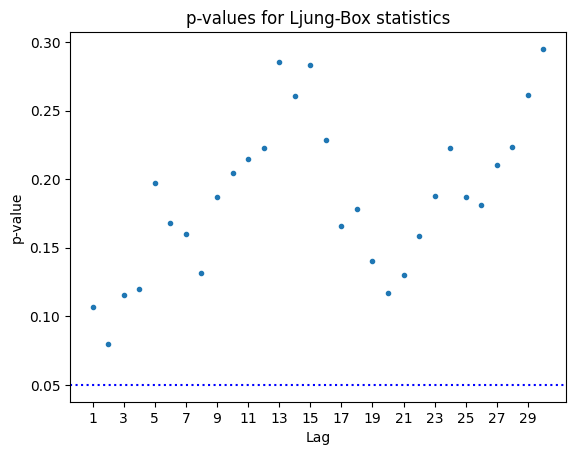

In [ ]:
plot_LB_pvalue(garchresid, noestimatedcoef=0, nolags=30)
plt.show()

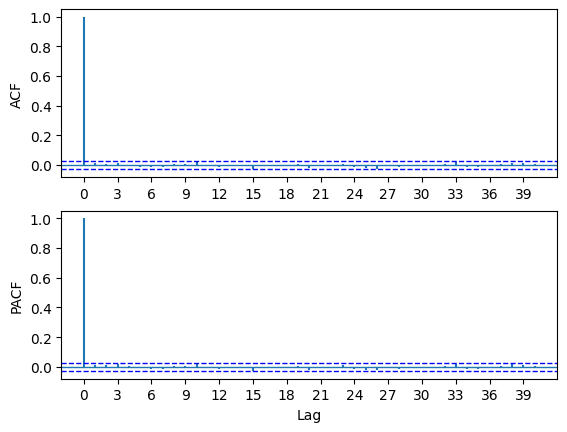

In [ ]:
acf_pacf_fig(garchresid**2, both=True, lag=40)
plt.show()

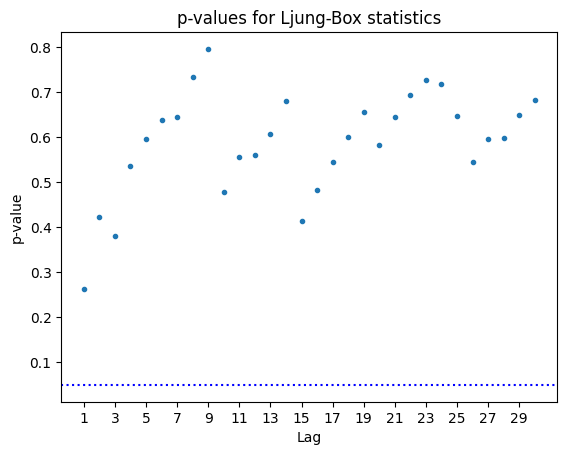

In [ ]:
plot_LB_pvalue(garchresid**2, noestimatedcoef=0, nolags=30)
plt.show()

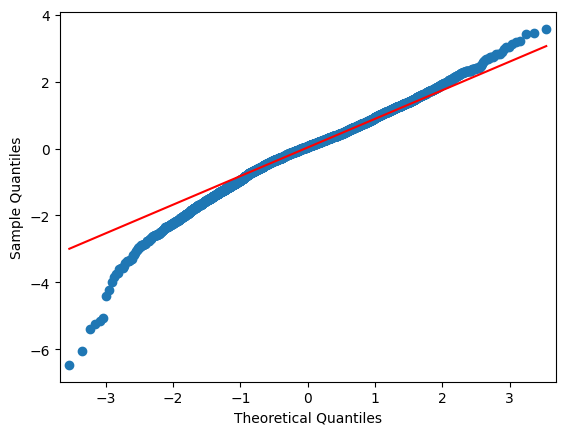

In [ ]:
from statsmodels.graphics.api import qqplot
qqplot(garchresid, line='q', fit=True); plt.show()


#Other Extensions
1.exponential GARCH(EGARCH Models):used to allow for asymmetric effects between positive and negative returns.
2. threshold GARCH (TGARCH) model to handle leverage effects.

# IBM Stock Log Returns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from PythonTsa.plot_acf_pacf import acf_pacf_fig
from PythonTsa.LjungBoxtest import plot_LB_pvalue
from PythonTsa.datadir import getdtapath
dtapath=getdtapath()
ibm=pd.read_csv(dtapath + 'ibmlogret.csv',header=0)


In [ ]:
dtapath

'/usr/local/lib/python3.10/dist-packages/PythonTsa/Ptsadata/'

In [ ]:
ibm

,date,logreturn
0,2000/1/1,3.975555
1,2000/2/1,-8.842966
2,2000/3/1,14.261085
3,2000/4/1,-5.983268
4,2000/5/1,-3.827969
...,...,...
235,2019/8/1,-8.963958
236,2019/9/1,8.214685
237,2019/10/1,-8.380326
238,2019/11/1,0.536952


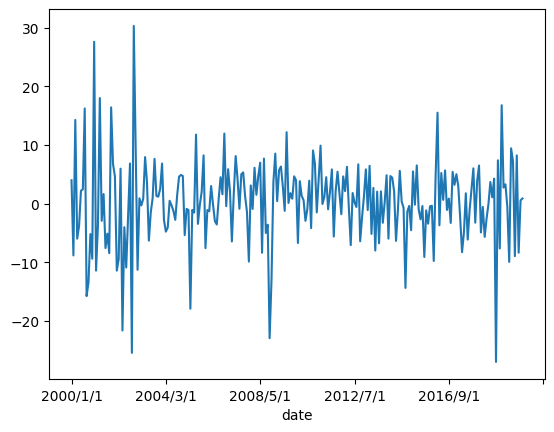

In [ ]:
logret=ibm['logreturn']
logret.index=ibm['date']
logret.plot(); plt.show()

In [ ]:
sm.tsa.kpss(logret, regression='c', nlags='auto')

<ipython-input-50-e849300ce62a>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  sm.tsa.kpss(logret, regression='c', nlags='auto')


(0.07583649910331418,
 0.1,
 5,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

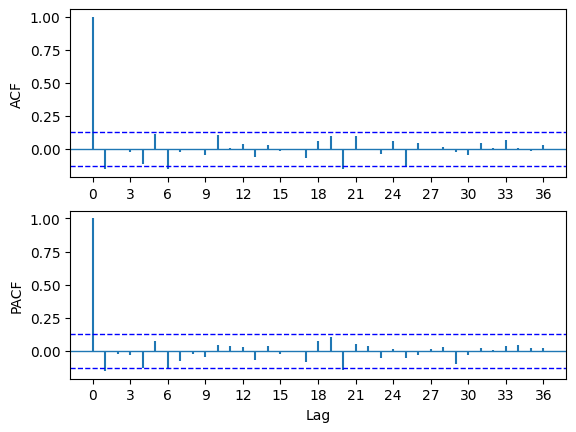

In [ ]:
acf_pacf_fig(logret, both=True, lag=36)
plt.show()

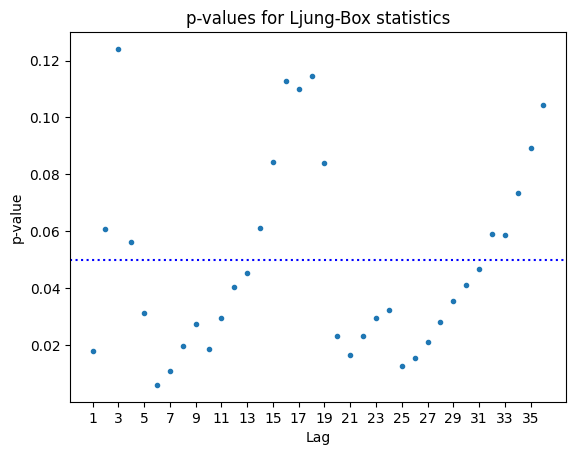

In [ ]:
plot_LB_pvalue(logret, noestimatedcoef=0, nolags=36)
plt.show()

In [ ]:
!pip install statsmodels==0.14.4

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.tsa.arima.model.ARIMA

SyntaxError: invalid syntax (<ipython-input-66-7e54fd9c92ba>, line 1)

In [ ]:
logret=ibm['logreturn']
from PythonTsa.Selecting_arma import choose_arma
# for statsmodels 0.13.0 and later, see the last code below
choose_arma(logret, max_p=2, max_q=2, ctrl=1.01)
arma=sm.tsa.ARMA(logret, order=(0,1)).fit(trend='nc')
# for statsmodels 0.13.0 and later, see the last code below
print(arma.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
armaresid=arma.resid
plot_LB_pvalue(armaresid, noestimatedcoef=1, nolags=36)
plt.show()

In [ ]:
plot_LB_pvalue(armaresid**2, noestimatedcoef=0, nolags=36)
plt.show()

In [ ]:
from arch import arch_model
garch = arch_model(armaresid, p=1, q=1,mean='Zero').fit(disp='off')
print(garch.summary())

In [ ]:
egarch = arch_model(armaresid, p=0, o=1, q=1, mean='Zero',vol='EGARCH').fit(disp='off')
print(egarch.summary())

In [ ]:
egarchresid=egarch.std_resid
plot_LB_pvalue(egarchresid, noestimatedcoef=0, nolags=36)
plt.show()

In [ ]:
plot_LB_pvalue(egarchresid**2, noestimatedcoef=0, nolags=36)
plt.show()

In [ ]:
from statsmodels.graphics.api import qqplot
qqplot(egarchresid, line='q', fit=True); plt.show()

In [ ]:
# the following is for statsmodels of v. 0.13.0 and later
from PythonTsa.Selecting_arma2 import choose_arma2
choose_arma2(logret, max_p=2, max_q=2, ctrl=1.01)
from statsmodels.tsa.arima.model import ARIMA
arma=ARIMA(logret, order=(0,0,1),trend='n').fit()